In [1]:
import os
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model
import tensorflow.gfile as gfile
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data(path='mnist.npz')
x_train = x_train_raw.reshape(x_train_raw.shape[0], x_train_raw.shape[1] * x_train_raw.shape[2])
x_test = x_test_raw.reshape(x_test_raw.shape[0], x_test_raw.shape[1] * x_test_raw.shape[2])
x_train = x_train / 255.0
x_test = x_test / 255.0

num_classes = 10
y_train = np_utils.to_categorical(y_train_raw, num_classes)
y_test = np_utils.to_categorical(y_test_raw, num_classes)

print("x_train.shape = {}, y_train.shape = {}".format(x_train.shape, y_train.shape))
print("x_test.shape = {}, y_test.shape = {}".format(x_test.shape, y_test.shape))

x_train.shape = (60000, 784), y_train.shape = (60000, 10)
x_test.shape = (10000, 784), y_test.shape = (10000, 10)


In [3]:
model = Sequential()

model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [4]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2198 - acc: 0.9356 - val_loss: 0.1022 - val_acc: 0.9687
Epoch 2/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0791 - acc: 0.9755 - val_loss: 0.0737 - val_acc: 0.9764
Epoch 3/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0505 - acc: 0.9839 - val_loss: 0.0701 - val_acc: 0.9776
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0360 - acc: 0.9883 - val_loss: 0.0766 - val_acc: 0.9775
Epoch 5/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0273 - acc: 0.9911 - val_loss: 0.0800 - val_acc: 0.9806


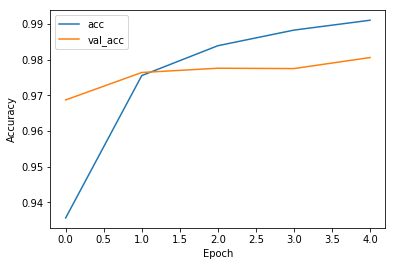

In [5]:
plt.figure()
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

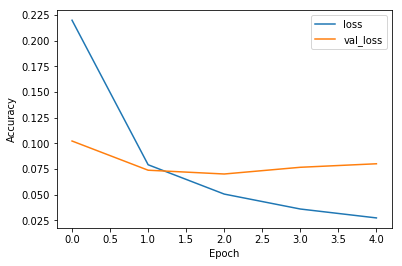

In [6]:
plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
save_dir = './model/'
if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_path = os.path.join(save_dir, 'mnist.h5')
model.save(model_path)

In [8]:
loaded_model = load_model(model_path)

result = loaded_model.evaluate(x_test, y_test, verbose=1)
print("test loss: {}, test accuracy: {}".format(result[0], result[1]))

predict = loaded_model.predict_classes(x_test)

correct_idx = np.nonzero(predict == y_test_raw)[0]
incorrect_idx = np.nonzero(predict != y_test_raw)[0]

10000/10000 [==============================] - 0s 36us/step
test loss: 0.08003030941758334, test accuracy: 0.9806


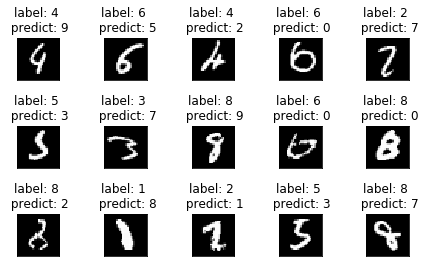

In [9]:
fig = plt.figure()
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.tight_layout()
    idx = incorrect_idx[i]
    plt.imshow(x_test_raw[idx], cmap='gray')
    plt.title("label: {} \n predict: {}".format(y_test_raw[idx], predict[idx]))
    plt.xticks([])
    plt.yticks([])